# **KELOLA DATA**

In [ ]:
import pandas as pd
from google.colab import files
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Mengunggah file
uploaded = files.upload()



Saving DATA IG,YT,FB-Label2.csv to DATA IG,YT,FB-Label2.csv


In [ ]:
# Membaca file CSV
df = pd.read_csv("DATA IG,YT,FB-Label2.csv")

# Mengecek baris kosong
baris_kosong = df[df.isnull().any(axis=1)]

# Menampilkan jumlah baris kosong
jumlah_baris_kosong = baris_kosong.shape[0]

# Menampilkan indeks baris kosong
indeks_baris_kosong = baris_kosong.index.tolist()

print(f"Jumlah baris kosong: {jumlah_baris_kosong}")
print(f"Indeks baris kosong: {indeks_baris_kosong}")

df

Jumlah baris kosong: 0
Indeks baris kosong: []


,Username,Comment,Post Link,Label
0,rachmatsadont,Ada pi baru dibilang ada 😁,https://www.instagram.com/p/C5pDGE4MM_x/,negatif
1,just_wandri,Minimal tidak alih fungsi jadi Pasar 😌😌,https://www.instagram.com/p/C5pDGE4MM_x/,negatif
2,resqyjaaa,Lucu sekali kalau begitu Aneh😆,https://www.instagram.com/p/C5pDGE4MM_x/,negatif
3,omarcello_12,😂😂😂 apakah akan menjadi kisah barombong jilid 2🗿,https://www.instagram.com/p/C5pDGE4MM_x/,negatif
4,abd.karim.26,Kenapa ga Barombong aja di selesaikan permasal...,https://www.instagram.com/p/C5pDGE4MM_x/,negatif
...,...,...,...,...
684,Barata Jusriadi Kahar,Bisa2 nanti ada 3 stadion standar Fifa di Maka...,https://www.facebook.com/groups/30906818285462...,negatif
685,Syamsuddin Syam,4 stadion 1 Barombong 2 Mattoanging 3 Untia 4 ...,https://www.facebook.com/groups/30906818285462...,negatif
686,Barata Jusriadi Kahar,https://scontent.fupg6-1.fna.fbcdn.net/v/t39.1...,https://www.facebook.com/groups/30906818285462...,netral
687,Najja Muddin,bilang Cerita campuran itu sekarang sudah terl...,https://www.facebook.com/groups/30906818285462...,negatif


# LABELLING

Jumlah baris dengan label positif: 100
Jumlah baris dengan label negatif: 436
Jumlah baris dengan label netral: 153


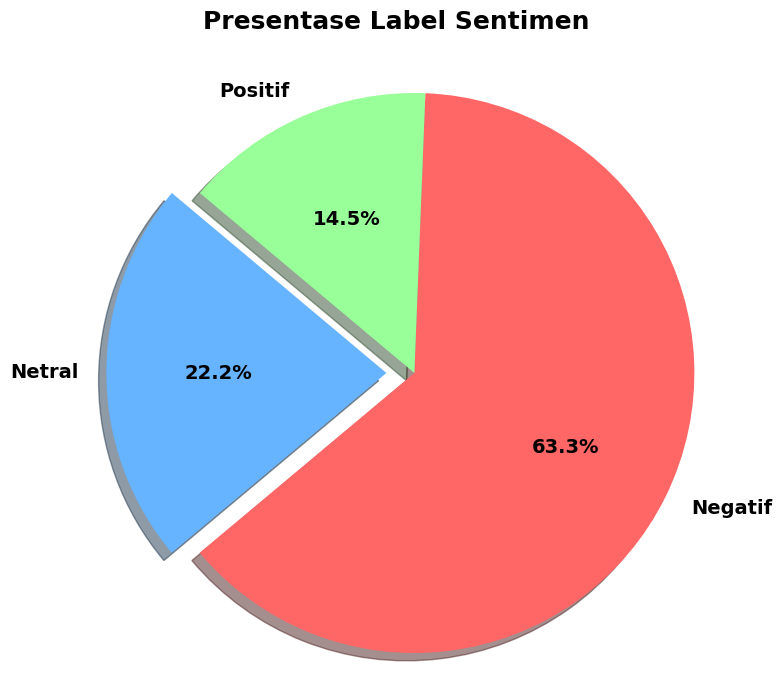

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari file CSV
data = pd.read_csv('DATA IG,YT,FB-Label2.csv')

# Menghitung jumlah baris berdasarkan label
label_counts = data['Label'].value_counts()  # Ganti 'Label' dengan nama kolom yang menyimpan label sentimen

# Menampilkan hasil
print("Jumlah baris dengan label positif:", label_counts.get('positif', 0))
print("Jumlah baris dengan label negatif:", label_counts.get('negatif', 0))
print("Jumlah baris dengan label netral:", label_counts.get('netral', 0))

# Data untuk pie chart
labels = ['Netral', 'Negatif', 'Positif']
sizes = [label_counts.get('netral', 0), label_counts.get('negatif', 0), label_counts.get('positif', 0)]
colors = ['#66b3ff', '#ff6666', '#99ff99']
explode = (0.1, 0, 0)  # Hanya "meledakkan" irisan pertama

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    explode=explode,
    labels=labels,
    colors=colors,
    autopct=lambda pct: f'{pct:.1f}%',
    shadow=True,
    startangle=140,
    textprops={'fontweight': 'bold', 'fontsize': 14}  # Membuat label dan persentase bold dan lebih besar
)

# Membuat title menjadi bold dan lebih besar
plt.title('Presentase Label Sentimen \n', fontweight='bold', fontsize=18)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# **PRE-PROCESSING**

Cleaning

In [ ]:
df = pd.read_csv('DATA IG,YT,FB-Label2.csv')
df.head(689)

,Username,Comment,Post Link,Label
0,rachmatsadont,Ada pi baru dibilang ada 😁,https://www.instagram.com/p/C5pDGE4MM_x/,negatif
1,just_wandri,Minimal tidak alih fungsi jadi Pasar 😌😌,https://www.instagram.com/p/C5pDGE4MM_x/,negatif
2,resqyjaaa,Lucu sekali kalau begitu Aneh😆,https://www.instagram.com/p/C5pDGE4MM_x/,negatif
3,omarcello_12,😂😂😂 apakah akan menjadi kisah barombong jilid 2🗿,https://www.instagram.com/p/C5pDGE4MM_x/,negatif
4,abd.karim.26,Kenapa ga Barombong aja di selesaikan permasal...,https://www.instagram.com/p/C5pDGE4MM_x/,negatif
...,...,...,...,...
684,Barata Jusriadi Kahar,Bisa2 nanti ada 3 stadion standar Fifa di Maka...,https://www.facebook.com/groups/30906818285462...,negatif
685,Syamsuddin Syam,4 stadion 1 Barombong 2 Mattoanging 3 Untia 4 ...,https://www.facebook.com/groups/30906818285462...,negatif
686,Barata Jusriadi Kahar,https://scontent.fupg6-1.fna.fbcdn.net/v/t39.1...,https://www.facebook.com/groups/30906818285462...,netral
687,Najja Muddin,bilang Cerita campuran itu sekarang sudah terl...,https://www.facebook.com/groups/30906818285462...,negatif


In [ ]:
import pandas as pd
import re

# Membaca file CSV
df = pd.read_csv("DATA IG,YT,FB-Label2.csv")

# Menghapus angka dan karakter non-alfabet dari kolom 'Comment'
df['Comment'] = df['Comment'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x) if isinstance(x, str) else '')

# Mengubah teks menjadi huruf kecil
df['Comment'] = df['Comment'].str.lower()

# Menghapus URL d  ari kolom 'Comment'
df['Comment'] = df['Comment'].apply(lambda x: re.sub(r'http\S+', '', x))

# Menghapus spasi yang berlebihan
df['Comment'] = df['Comment'].apply(lambda x: re.sub(r'\s+', ' ', x.strip()))

# Menghapus baris yang duplikat
df.drop_duplicates(inplace=True)

# Menghapus baris yang memiliki nilai NaN atau kosong setelah pembersihan
df.dropna(subset=['Comment'], inplace=True)
df = df[df['Comment'].str.strip() != '']

# Menyimpan data yang telah dibersihkan ke file baru
df.to_csv('clean.csv', index=False)

# Menampilkan sepuluh baris pertama setelah pembersihan
df.head(50)

,Username,Comment,Post Link,Label
0,rachmatsadont,ada pi baru dibilang ada,https://www.instagram.com/p/C5pDGE4MM_x/,negatif
1,just_wandri,minimal tidak alih fungsi jadi pasar,https://www.instagram.com/p/C5pDGE4MM_x/,negatif
2,resqyjaaa,lucu sekali kalau begitu aneh,https://www.instagram.com/p/C5pDGE4MM_x/,negatif
3,omarcello_12,apakah akan menjadi kisah barombong jilid,https://www.instagram.com/p/C5pDGE4MM_x/,negatif
4,abd.karim.26,kenapa ga barombong aja di selesaikan permasal...,https://www.instagram.com/p/C5pDGE4MM_x/,negatif
5,ansar_arifin85,bangun mi cepat sebelum berubah pikiran lagi,https://www.instagram.com/p/C5pDGE4MM_x/,positif
6,omega.rantesalu,bikin mi dulu pndasinya,https://www.instagram.com/p/C5pDGE4MM_x/,positif
7,ruddhy01,tundulu jgn sampai diratakan trus lupa dibangu...,https://www.instagram.com/p/C5pDGE4MM_x/,negatif
8,nzz_010516,indikasi di korupsi lg,https://www.instagram.com/p/C5pDGE4MM_x/,negatif
9,w_one_official,semoga gak di korupsi,https://www.instagram.com/p/C5pDGE4MM_x/,negatif


In [ ]:
#mengecek baris kosong
df = pd.read_csv("clean.csv")
df.isnull().sum()

,0
Username,0
Comment,0
Post Link,0
Label,0


In [ ]:
#Mengecek data duplikat
df = pd.read_csv("clean.csv")
df.duplicated().sum()

0

In [ ]:
#mengecek baris non-alflabet
df = pd.read_csv("clean.csv")
df['Comment'].str.contains(r'[^a-zA-Z\s]', na=False).sum()

0

In [ ]:
#Mengecek baris yang mengandung URL
df = pd.read_csv("clean.csv")
df[df['Comment'].str.contains(r'http\S+', na=False)].sum()

,0
Username,0
Comment,0
Post Link,0
Label,0


In [ ]:
#Mengecek Baris berlebih
df = pd.read_csv("clean.csv")
df[df['Comment'].str.contains(r'\s{2,}', na=False)].sum()

,0
Username,0
Comment,0
Post Link,0
Label,0


Tokenisasi

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

# Pastikan NLTK sudah diunduh sebelumnya
nltk.download('punkt')

# Membaca data yang sudah dibersihkan
df = pd.read_csv('clean.csv')

# Fungsi untuk tokenisasi
def tokenize_text(text):
    return word_tokenize(text)

# Tokenisasi
df['Tokenisasi'] = df['Comment'].apply(lambda x: tokenize_text(x))

# Menghapus kolom 'Comment'
df.drop(columns=['Comment'], inplace=True)

# Menyusun ulang kolom-kolom agar 'Tokenisasi' berada di urutan kedua
columns_order = ['Username', 'Tokenisasi'] + [col for col in df.columns if col not in ['Username', 'Tokenisasi']]
df = df[columns_order]

# Menyimpan data yang telah di-tokenisasi
df.to_csv('Tokenisasi.csv', index=False)

# Menampilkan sepuluh baris pertama setelah tokenisasi
df.head(50)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Username,Tokenisasi,Post Link,Label
0,rachmatsadont,"[ada, pi, baru, dibilang, ada]",https://www.instagram.com/p/C5pDGE4MM_x/,negatif
1,just_wandri,"[minimal, tidak, alih, fungsi, jadi, pasar]",https://www.instagram.com/p/C5pDGE4MM_x/,negatif
2,resqyjaaa,"[lucu, sekali, kalau, begitu, aneh]",https://www.instagram.com/p/C5pDGE4MM_x/,negatif
3,omarcello_12,"[apakah, akan, menjadi, kisah, barombong, jilid]",https://www.instagram.com/p/C5pDGE4MM_x/,negatif
4,abd.karim.26,"[kenapa, ga, barombong, aja, di, selesaikan, p...",https://www.instagram.com/p/C5pDGE4MM_x/,negatif
5,ansar_arifin85,"[bangun, mi, cepat, sebelum, berubah, pikiran,...",https://www.instagram.com/p/C5pDGE4MM_x/,positif
6,omega.rantesalu,"[bikin, mi, dulu, pndasinya]",https://www.instagram.com/p/C5pDGE4MM_x/,positif
7,ruddhy01,"[tundulu, jgn, sampai, diratakan, trus, lupa, ...",https://www.instagram.com/p/C5pDGE4MM_x/,negatif
8,nzz_010516,"[indikasi, di, korupsi, lg]",https://www.instagram.com/p/C5pDGE4MM_x/,negatif
9,w_one_official,"[semoga, gak, di, korupsi]",https://www.instagram.com/p/C5pDGE4MM_x/,negatif


In [ ]:
#mengecek baris kosong
df = pd.read_csv("Tokenisasi.csv")
df.isnull().sum()

,0
Username,0
Tokenisasi,0
Post Link,0
Label,0


normalisasi

In [ ]:
# Membaca data yang sudah di-tokenisasi
df = pd.read_csv('Tokenisasi.csv')

# Kamus normalisasi
normalization_dict = {
    'takkala': 'terlanjur',
    'mkassar': 'makassar',
    'wanjay': 'luar biasa',
    'kap': 'kapasitas',
    'rb': 'ribu',
    'bro': 'teman',
    'anggarana': 'anggarannya',
    'pambangunan': 'pembangunan',
    'daeng': 'saudara',
    'sdah': 'sudah',
    'ku': 'saya',
    'bos': 'bos',
    'hoax': 'berita palsu',
    'karoppo': 'rapuh',
    'seng': 'lagi',
    'klu': 'kalau',
    'was': 'hati-hati',
    'lg': 'lagi',
    'sj' : 'saja',
    'pilgub': 'pemilihan gubernur',
    'berteli': 'berbelit-belit',
    'cpt': 'cepat',
    'cagub': 'calon gubernur',
    'mag': 'ke saya',
    'dlu': 'dulu',
    'gappai': 'kenapa',
    'sanging': 'saking',
    'jlas': 'jelas',
    'standionx': 'stadion',
    'ejapi': 'bicara',
    'na': 'nya',
    'kungainna': 'sudah',
    'punna': 'kalau',
    'kamma': 'dimana',
    'anne': 'ini',
    'ga': 'tidak',
    'ndak': 'tidak',
    'nda' : 'tidak',
    'tdk': 'tidak',
    'jgn': 'jangan',
    'gak': 'tidak',
    'mako': 'saja',
    'tenamo': 'jadi',
    'tompi': 'baru',
    'gassing': 'nanti',
    'tabe': 'permisi',
    'kodong': 'kasihan',
    'tena': 'tidak',
    'jiyg': 'yang',
    'sampai': 'sampai',
    'mau': 'ingin',
    'nge': 'sudah',
    'kasi': 'beri',
    'kelarmi': 'selesai',
    'sja': 'saja',
    'bru': 'baru',
    'klo': 'kalau',
    'ntr': 'nanti',
    'dri': 'dari',
    'pda': 'pada',
    'nya': 'nya',
    'mki': 'kamu',
    'jd': 'jadi',
    'bsa': 'bisa',
    'doe': 'uang',
    'kaue': 'kamu',
    'sbntrka': 'sebentar',
    'ng': 'tidak',
    'tau': 'tahu',
    'mk': 'mungkin',
    'dlm': 'dalam',
    'insyaallah': 'semoga',
    'mdhan': 'mudahan',
    'sy': 'saya',
    'sa': 'saya',
    'ma': 'sama',
    'kdng': 'kadang',
    'dong': 'tolong',
    'gt': 'itu',
    'bgt': 'banget',
    'tp': 'tapi',
    'dr': 'dari',
    'sdh': 'sudah',
    'pdhl': 'padahal',
    'nggak': 'tidak',
    'tlg': 'tolong',
    'bg': 'banget',
    'td': 'tadi',
    'ttp': 'tetap',
    'ank': 'anak',
    'bs': 'bisa',
    'jg': 'juga',
    'kl': 'kalau',
    'gmn': 'bagaimana',
    'blg': 'bilang',
    'sbh': 'sebuah',
    'mks': 'makassar',
    'dng': 'dengan',
    'psm': 'persatuan sepakbola makassar',
    'twn': 'teman',
    'knp': 'kenapa',
    'mn': 'mana',
    'ni': 'ini',
    'hrus': 'harus',
    'hsl': 'hasil',
    'tgg': 'tunggu',
    'plg': 'paling',
    'msh': 'masih',
    'ok': 'oke',
    'ya': 'ya',
    'gpp': 'tidak apa-apa',
    'loh': 'loh',
    'yah': 'ya',
    'lah': 'lah',
    'spt': 'seperti',
    'lbh': 'lebih',
    'bnyk': 'banyak',
    'tmn': 'teman',
    'ngga': 'tidak',
    'll': 'lalu',
    'utk': 'untuk',
    'trmksh': 'terima kasih',
    'bkn': 'bukan',
    'y': 'ya',
    'yg': 'yang',
    'tngh': 'tengah',
    'sbp': 'sebab',
    'th': 'tahun',
    'dgn': 'dengan',
    'mksd': 'maksud',
    'sbnyk': 'sebanyak',
    'syg': 'sayang',
    'kmu': 'kamu',
    'd': 'di',
    'sja': 'saja',
    'aja': 'saja',
    'pndasinya': 'pondasinya',
    'tundulu': 'tunggu dulu',
    'cacicu': 'cerita',
    'trus': 'terus',
    'maq': 'ke saya',
    'doang': 'saja',
    'pilkada': 'pemilihan kepala daerah',
    'gub': 'gubernur',
    'carita': 'cerita',
    'jukir': 'juru parkir',
    'tsb': 'tersebut',
    'bulshit': 'omong kosong',
    'guberur': 'gubernur',
    'bs': 'bisa',
    'apalgi': 'apalagi',
    'walkocaknya': 'walikotanya',
    'j' : 'ji',
    'mentri' : 'menteri',
    'stadionx' : 'stadion',
    'dll' : 'dan lain lain',
    'pemprov' : 'pemerintah provinsi',
    'sulsel' : 'sulawesi selatan',
    'pemkot' : 'pemerintah kota',
    'pemkab' : 'pemerintah kabupaten',
    'jdi' : 'jadi',
    'korup' : 'korupsi',
    'php' : 'harapan palsu',
    'cerita': 'omong kosong',
    'iye' : 'iya',
    'wapres' : 'wakil presiden',
    'krna' : 'karena'
}

# Fungsi untuk normalisasi teks
def normalize_tokens(tokens, normalization_dict):
    return [normalization_dict[word] if word in normalization_dict else word for word in tokens]

# Normalisasi
df['Normalisasi'] = df['Tokenisasi'].apply(lambda x: normalize_tokens(eval(x), normalization_dict))

# Menghapus kolom 'Tokenized'
df.drop(columns=['Tokenisasi'], inplace=True)

# Menyusun ulang kolom-kolom agar 'Normalisasi' berada di urutan kedua
columns_order = ['Username', 'Normalisasi'] + [col for col in df.columns if col not in ['Username', 'Normalisasi']]
df = df[columns_order]

# Menyimpan data yang telah dinormalisasi
df.to_csv('Normalisasi.csv', index=False)

# Menampilkan sepuluh baris pertama setelah normalisasi
df.head(50)

,Username,Normalisasi,Post Link,Label
0,rachmatsadont,"[ada, pi, baru, dibilang, ada]",https://www.instagram.com/p/C5pDGE4MM_x/,negatif
1,just_wandri,"[minimal, tidak, alih, fungsi, jadi, pasar]",https://www.instagram.com/p/C5pDGE4MM_x/,negatif
2,resqyjaaa,"[lucu, sekali, kalau, begitu, aneh]",https://www.instagram.com/p/C5pDGE4MM_x/,negatif
3,omarcello_12,"[apakah, akan, menjadi, kisah, barombong, jilid]",https://www.instagram.com/p/C5pDGE4MM_x/,negatif
4,abd.karim.26,"[kenapa, tidak, barombong, saja, di, selesaika...",https://www.instagram.com/p/C5pDGE4MM_x/,negatif
5,ansar_arifin85,"[bangun, mi, cepat, sebelum, berubah, pikiran,...",https://www.instagram.com/p/C5pDGE4MM_x/,positif
6,omega.rantesalu,"[bikin, mi, dulu, pondasinya]",https://www.instagram.com/p/C5pDGE4MM_x/,positif
7,ruddhy01,"[tunggu dulu, jangan, sampai, diratakan, terus...",https://www.instagram.com/p/C5pDGE4MM_x/,negatif
8,nzz_010516,"[indikasi, di, korupsi, lagi]",https://www.instagram.com/p/C5pDGE4MM_x/,negatif
9,w_one_official,"[semoga, tidak, di, korupsi]",https://www.instagram.com/p/C5pDGE4MM_x/,negatif


In [ ]:
df = pd.read_csv('Normalisasi.csv')
df.isnull().sum()

,0
Username,0
Normalisasi,0
Post Link,0
Label,0


stopword

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import ast

# Mengunduh stopwords dari NLTK
nltk.download('stopwords')

# Membaca data dari file CSV
data = pd.read_csv('Normalisasi.csv')

# Stopwords dari NLTK untuk Bahasa Indonesia
stop_words_nltk = set(stopwords.words('indonesian'))

# Stopwords tambahan
custom_stop_words = {
    'ki', 'ji', 'mi', 'pi', 'ko', 'ma', 'ka',
    'nih', 'sih', 'ya', 'deh', 'kok', 'si', 'toh', 'lah', 'saja', 'nya','mo'
}

# Menggabungkan stopwords dari NLTK dengan custom stopwords
stop_words = stop_words_nltk.union(custom_stop_words)

# Fungsi untuk menghapus stopwords dari teks yang dalam format list string
def remove_stopwords(text):
    if isinstance(text, str):
        # Mengubah format string list menjadi list nyata
        words = ast.literal_eval(text)
        filtered_words = [word for word in words if word.lower() not in stop_words]
        return str(filtered_words)  # Mengembalikan dalam format string list
    return ''

# Terapkan penghapusan stopwords pada kolom 'Normalisasi'
data['Stopword'] = data['Normalisasi'].apply(lambda x: remove_stopwords(x) if isinstance(x, str) else '')

# Hapus kolom 'Normalisasi'
data.drop(columns=['Normalisasi'], inplace=True)

# Menyusun ulang kolom-kolom agar 'Stopword' berada di urutan kedua
columns_order = ['Username', 'Stopword'] + [col for col in data.columns if col not in ['Username', 'Stopword']]
data = data[columns_order]

# Simpan dataframe dengan kolom baru
data.to_csv('Stopword.csv', index=False)

# Tampilkan 50 data pertama
data.head(50)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Username,Stopword,Post Link,Label
0,rachmatsadont,['dibilang'],https://www.instagram.com/p/C5pDGE4MM_x/,negatif
1,just_wandri,"['minimal', 'alih', 'fungsi', 'pasar']",https://www.instagram.com/p/C5pDGE4MM_x/,negatif
2,resqyjaaa,"['lucu', 'aneh']",https://www.instagram.com/p/C5pDGE4MM_x/,negatif
3,omarcello_12,"['kisah', 'barombong', 'jilid']",https://www.instagram.com/p/C5pDGE4MM_x/,negatif
4,abd.karim.26,"['barombong', 'selesaikan', 'permasalahannya']",https://www.instagram.com/p/C5pDGE4MM_x/,negatif
5,ansar_arifin85,"['bangun', 'cepat', 'berubah', 'pikiran']",https://www.instagram.com/p/C5pDGE4MM_x/,positif
6,omega.rantesalu,"['bikin', 'pondasinya']",https://www.instagram.com/p/C5pDGE4MM_x/,positif
7,ruddhy01,"['tunggu dulu', 'diratakan', 'lupa', 'dibangun...",https://www.instagram.com/p/C5pDGE4MM_x/,negatif
8,nzz_010516,"['indikasi', 'korupsi']",https://www.instagram.com/p/C5pDGE4MM_x/,negatif
9,w_one_official,"['semoga', 'korupsi']",https://www.instagram.com/p/C5pDGE4MM_x/,negatif


In [ ]:
# Membaca file CSV
df = pd.read_csv("Stopword.csv")

# Mengecek baris kosong
baris_kosong = df[df.isnull().any(axis=1)]

# Menampilkan jumlah baris kosong
jumlah_baris_kosong = baris_kosong.shape[0]

# Menampilkan indeks baris kosong
indeks_baris_kosong = baris_kosong.index.tolist()

print(f"Jumlah baris kosong: {jumlah_baris_kosong}")
print(f"Indeks baris kosong: {indeks_baris_kosong}")

Jumlah baris kosong: 0
Indeks baris kosong: []


stemming

In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Baca file Stopword.csv
df = pd.read_csv('Stopword.csv')
# Inisialisasi Stemmer dari Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Dictionary untuk kata-kata khusus
custom_dict = {
    "pemilu": "pemilu",
    "anggaran": "anggaran",
    "semoga": "semoga",
    "giliran": "giliran",
    "selama" : "selama",
    "setuju" : "setuju"
}
# Fungsi untuk melakukan stemming
def custom_stem(text):
    # Pertama, lakukan stemming
    stemmed_text = stemmer.stem(text)
    # Kemudian, ganti kata-kata khusus
    for key, value in custom_dict.items():
        stemmed_text = stemmed_text.replace(stemmer.stem(key), value)
    return stemmed_text

# Terapkan custom_stem pada kolom 'Stopword'
df['Stemming'] = df['Stopword'].apply(lambda x: custom_stem(x) if isinstance(x, str) else '')

# Hapus kolom 'Stopword'
df.drop(columns=['Stopword'], inplace=True)

# Menyusun ulang kolom-kolom agar 'Stemming' berada di urutan kedua
columns_order = ['Username', 'Stemming'] + [col for col in df.columns if col not in ['Username', 'Stemming']]
df = df[columns_order]
# Simpan dataframe dengan kolom baru
df.to_csv('Stemming.csv', index=False)

# Tampilkan beberapa baris pertama dari dataframe
df.head(50)

,Username,Stemming,Post Link,Label
0,rachmatsadont,bilang,https://www.instagram.com/p/C5pDGE4MM_x/,negatif
1,just_wandri,minimal alih fungsi pasar,https://www.instagram.com/p/C5pDGE4MM_x/,negatif
2,resqyjaaa,lucu aneh,https://www.instagram.com/p/C5pDGE4MM_x/,negatif
3,omarcello_12,kisah barombong jilid,https://www.instagram.com/p/C5pDGE4MM_x/,negatif
4,abd.karim.26,barombong selesai masalah,https://www.instagram.com/p/C5pDGE4MM_x/,negatif
5,ansar_arifin85,bangun cepat ubah pikir,https://www.instagram.com/p/C5pDGE4MM_x/,positif
6,omega.rantesalu,bikin pondasinya,https://www.instagram.com/p/C5pDGE4MM_x/,positif
7,ruddhy01,tunggu dulu rata lupa bangun ulang stadion korban,https://www.instagram.com/p/C5pDGE4MM_x/,negatif
8,nzz_010516,indikasi korupsi,https://www.instagram.com/p/C5pDGE4MM_x/,negatif
9,w_one_official,semoga korupsi,https://www.instagram.com/p/C5pDGE4MM_x/,negatif


In [ ]:
# Membaca file CSV
df = pd.read_csv("Stemming.csv")

# Mengecek baris kosong
baris_kosong = df[df.isnull().any(axis=1)]

# Menampilkan jumlah baris kosong
jumlah_baris_kosong = baris_kosong.shape[0]

# Menampilkan indeks baris kosong
indeks_baris_kosong = baris_kosong.index.tolist()

print(f"Jumlah baris kosong: {jumlah_baris_kosong}")
print(f"Indeks baris kosong: {indeks_baris_kosong}")

Jumlah baris kosong: 13
Indeks baris kosong: [73, 99, 121, 155, 163, 205, 448, 484, 506, 542, 552, 578, 640]


In [ ]:
import pandas as pd

# Membaca data dari file CSV
df = pd.read_csv('Stemming.csv')

# Menghapus baris yang memiliki nilai NaN atau kosong setelah pembersihan
df.dropna(subset=['Stemming'], inplace=True)
df = df[df['Stemming'].str.strip() != '']

# Menyimpan data yang telah dibersihkan
df.to_csv('Stemmingg.csv', index=False)

# Menambahkan informasi platform berdasarkan 'Post Link'
df['Platform'] = df['Post Link'].apply(lambda x: 'Facebook' if 'facebook' in x else ('Instagram' if 'instagram' in x else 'YouTube'))

# Menghitung jumlah data per platform
platform_counts = df['Platform'].value_counts()

# Menampilkan hasil
print("Jumlah data per platform:")
print(platform_counts)

df


Jumlah data per platform:
Platform
YouTube      261
Instagram    213
Facebook     167
Name: count, dtype: int64


,Username,Stemming,Post Link,Label,Platform
0,rachmatsadont,bilang,https://www.instagram.com/p/C5pDGE4MM_x/,negatif,Instagram
1,just_wandri,minimal alih fungsi pasar,https://www.instagram.com/p/C5pDGE4MM_x/,negatif,Instagram
2,resqyjaaa,lucu aneh,https://www.instagram.com/p/C5pDGE4MM_x/,negatif,Instagram
3,omarcello_12,kisah barombong jilid,https://www.instagram.com/p/C5pDGE4MM_x/,negatif,Instagram
4,abd.karim.26,barombong selesai masalah,https://www.instagram.com/p/C5pDGE4MM_x/,negatif,Instagram
...,...,...,...,...,...
649,Alif Alif,stadion satu sepakbola makassar makassar biar ...,https://www.facebook.com/groups/30906818285462...,netral,Facebook
650,Muhammad Iqbal,bilang rencana tanah sengketa pemrov biar cair...,https://www.facebook.com/groups/30906818285462...,negatif,Facebook
651,Nasrullah Basaria,hae mari satu maju harga orang sulawesi selata...,https://www.facebook.com/groups/30906818285462...,positif,Facebook
652,Syamsuddin Syam,libat bangun bicara,https://www.facebook.com/groups/30906818285462...,netral,Facebook


In [ ]:
# Membaca file CSV
df = pd.read_csv("Stemmingg.csv")

# Mengecek baris kosong
baris_kosong = df[df.isnull().any(axis=1)]

# Menampilkan jumlah baris kosong
jumlah_baris_kosong = baris_kosong.shape[0]

# Menampilkan indeks baris kosong
indeks_baris_kosong = baris_kosong.index.tolist()

print(f"Jumlah baris kosong: {jumlah_baris_kosong}")
print(f"Indeks baris kosong: {indeks_baris_kosong}")

Jumlah baris kosong: 0
Indeks baris kosong: []


In [ ]:
import pandas as pd

data = pd.read_csv('Stemmingg.csv')

# Menghitung jumlah baris berdasarkan label
label_counts = data['Label'].value_counts()  # Ganti 'Sentiment_Label' dengan nama kolom yang menyimpan label sentimen

# Menampilkan hasil
print("Jumlah baris dengan label positif:", label_counts.get('positif', 0))
print("Jumlah baris dengan label negatif:", label_counts.get('negatif', 0))
print("Jumlah baris dengan label netral:", label_counts.get('netral', 0))


Jumlah baris dengan label positif: 98
Jumlah baris dengan label negatif: 417
Jumlah baris dengan label netral: 126


# **PEMBANGIAN DATA (TRAINING DAN TESTING)**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Baca file CSV yang telah dilabeli
df = pd.read_csv('Stemmingg.csv')

# Menghapus baris dengan sentimen netral
df = df[df['Label'] != 'netral']

# Memisahkan fitur dan label
X = df[['Stemming', 'Post Link']]
y = df['Label']

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menyimpan set pelatihan dan pengujian
train_data = pd.DataFrame({'Stemming': X_train['Stemming'], 'Post Link': X_train['Post Link'], 'Label': y_train})
test_data = pd.DataFrame({'Stemming': X_test['Stemming'], 'Post Link': X_test['Post Link'], 'Label': y_test})

train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

# Menampilkan beberapa baris pertama dari set pelatihan
train_data.head(50)

,Stemming,Post Link,Label
374,next barombong,https://www.youtube.com/watch?v=zHUD8MgBsGM&lc...,negatif
384,setuju mangkrak candi mesum wkwkwkwk,https://www.youtube.com/watch?v=I7LQc2u2Rck&lc...,negatif
197,buka puasa bicara kah pusing kapang,https://www.instagram.com/p/C4ZZEM1pvDq/,negatif
320,mending pupr bagun perintah provinsi barombong...,https://www.youtube.com/watch?v=zHUD8MgBsGM&lc...,negatif
612,stadion barombong anda masalahnnya selesai,https://www.facebook.com/groups/30906818285462...,negatif
211,gas bangun,https://www.instagram.com/p/C4ZZEM1pvDq/,positif
316,stadion barombong lanjut gengsi perintah,https://www.youtube.com/watch?v=zHUD8MgBsGM&lc...,negatif
421,hidup sudiang satu sepakbola makassar makassar,https://www.youtube.com/watch?v=I7LQc2u2Rck&lc...,positif
132,mana bangun stadion situ sengketa,https://www.instagram.com/p/C7BMS0zPi7X/,negatif
491,bilang jasa,https://www.facebook.com/groups/31434242575340...,negatif


In [ ]:
train_data

,Stemming,Post Link,Label
374,next barombong,https://www.youtube.com/watch?v=zHUD8MgBsGM&lc...,negatif
384,setuju mangkrak candi mesum wkwkwkwk,https://www.youtube.com/watch?v=I7LQc2u2Rck&lc...,negatif
197,buka puasa bicara kah pusing kapang,https://www.instagram.com/p/C4ZZEM1pvDq/,negatif
320,mending pupr bagun perintah provinsi barombong...,https://www.youtube.com/watch?v=zHUD8MgBsGM&lc...,negatif
612,stadion barombong anda masalahnnya selesai,https://www.facebook.com/groups/30906818285462...,negatif
...,...,...,...
83,bilang,https://www.instagram.com/p/C67qJZ3SgD4/,negatif
120,duga,https://www.instagram.com/p/C7Br1EMv30C/,negatif
318,rencana,https://www.youtube.com/watch?v=zHUD8MgBsGM&lc...,negatif
546,korupsi,https://www.facebook.com/suaradotcom/posts/pfb...,negatif


In [ ]:
test_data

,Stemming,Post Link,Label
357,hayalan tingkat dewa kodongkebanyakan minum ar...,https://www.youtube.com/watch?v=zHUD8MgBsGM&lc...,negatif
618,bilang omong kosong campur area barombong selesai,https://www.facebook.com/groups/30906818285462...,negatif
552,tanda pilih,https://www.facebook.com/suaradotcom/posts/pfb...,negatif
175,lumayan market politik kanda udah klaim progra...,https://www.instagram.com/p/C4ZZEM1pvDq/,negatif
621,tai bembe dutulu janji palsu,https://www.facebook.com/groups/30906818285462...,negatif
...,...,...,...
498,semoga mangkrak barombong nasib,https://www.facebook.com/groups/31434242575340...,negatif
190,realistis bebas tanah stadion barombong benah ...,https://www.instagram.com/p/C4ZZEM1pvDq/,negatif
325,mantap rencana bangun stadion makasar nampak g...,https://www.youtube.com/watch?v=zHUD8MgBsGM&lc...,negatif
629,saking cerita campur attu bangun stadion makas...,https://www.facebook.com/groups/30906818285462...,negatif


# **LATIH MODEL NAIVE BAYES**

In [ ]:
import pandas as pd
import numpy as np
import pickle
from sklearn.feature_extraction.text import CountVectorizer
# Membaca data pelatihan dari file CSV
train_data = pd.read_csv('train_data.csv')
# Menggunakan CountVectorizer
vectorizer = CountVectorizer()
x_train = vectorizer.fit_transform(train_data['Stemming']).toarray()
# Mendapatkan fitur (vocabulary) dari data
vocab = vectorizer.get_feature_names_out()
# Mengambil label sentimen dari data pelatihan
y = train_data['Label']
classes = y.unique()
# Menghitung prior probabilities P(c)
class_counts = y.value_counts()
class_prior = {cls: count / len(y) for cls, count in class_counts.items()}
# Menghitung likelihood P(z|c) untuk setiap kata dan kelas
word_counts = {cls: np.zeros(len(vocab)) for cls in classes}
for cls in classes:
    cls_indices = y == cls
    word_counts[cls] = x_train[cls_indices].sum(axis=0)
# Menghitung likelihood P(z|c) dengan laplace smoothing
alpha = 1  # Laplace smoothing parameter
word_probs = {
    cls: (word_counts[cls] + alpha) / (word_counts[cls].sum() + alpha * len(vocab))
    for cls in classes
}
# Menyimpan prior probabilities dan likelihoods ke dalam model
model = {
    'class_prior': class_prior,
    'word_probs': word_probs,
    'vocab': vocab
}
# Menyimpan model ke file
with open('naive_bayes_model.pkl', 'wb') as file:
    pickle.dump(model, file)
print("Model Naive Bayes berhasil disimpan sebagai 'naive_bayes_model.pkl'")


Model Naive Bayes berhasil disimpan sebagai 'naive_bayes_model.pkl'


In [ ]:
train_data.head(689)

,Stemming,Post Link,Label
0,next barombong,https://www.youtube.com/watch?v=zHUD8MgBsGM&lc...,negatif
1,setuju mangkrak candi mesum wkwkwkwk,https://www.youtube.com/watch?v=I7LQc2u2Rck&lc...,negatif
2,buka puasa bicara kah pusing kapang,https://www.instagram.com/p/C4ZZEM1pvDq/,negatif
3,mending pupr bagun perintah provinsi barombong...,https://www.youtube.com/watch?v=zHUD8MgBsGM&lc...,negatif
4,stadion barombong anda masalahnnya selesai,https://www.facebook.com/groups/30906818285462...,negatif
...,...,...,...
407,bilang,https://www.instagram.com/p/C67qJZ3SgD4/,negatif
408,duga,https://www.instagram.com/p/C7Br1EMv30C/,negatif
409,rencana,https://www.youtube.com/watch?v=zHUD8MgBsGM&lc...,negatif
410,korupsi,https://www.facebook.com/suaradotcom/posts/pfb...,negatif


# **TESTING MODEL**

In [ ]:
import pandas as pd
import numpy as np
import pickle
from sklearn.feature_extraction.text import CountVectorizer
# Membaca data uji
test_data = pd.read_csv('test_data.csv')
# Memuat model manual
with open('naive_bayes_model.pkl', 'rb') as file:
    model = pickle.load(file)
# Menggunakan CountVectorizer dengan vocab yang sama seperti saat pelatihan
vectorizer = CountVectorizer(vocabulary=model['vocab'])
x_test = vectorizer.transform(test_data['Stemming']).toarray()
# Menghitung probabilitas posterior untuk setiap kelas
def predict_sentiment(X, vocab, class_prior, word_probs):
    predictions = []
    for i in range(X.shape[0]):
        posteriors = []
        for cls in class_prior:
            # Menghitung probabilitas P(z|c) untuk setiap fitur
            prob = class_prior[cls]
            for j in range(len(vocab)):
                prob *= word_probs[cls][j] ** X[i][j]
            posteriors.append(prob)
        # Mengambil kelas dengan probabilitas tertinggi
        predicted_class = max(class_prior, key=lambda cls: posteriors[list(class_prior.keys()).index(cls)])
        predictions.append(predicted_class)
    return predictions
# Memprediksi data uji
y_pred = predict_sentiment(x_test, model['vocab'], model['class_prior'], model['word_probs'])
# Menambahkan kolom prediksi ke data uji
test_data['Predicted_Sentiment'] = y_pred
# Menyimpan hasil prediksi ke file CSV
test_data.to_csv('test_data_with_predictions.csv', index=False)
# Menampilkan data uji dengan prediksi
test_data


,Stemming,Post Link,Label,Predicted_Sentiment
0,hayalan tingkat dewa kodongkebanyakan minum ar...,https://www.youtube.com/watch?v=zHUD8MgBsGM&lc...,negatif,negatif
1,bilang omong kosong campur area barombong selesai,https://www.facebook.com/groups/30906818285462...,negatif,negatif
2,tanda pilih,https://www.facebook.com/suaradotcom/posts/pfb...,negatif,negatif
3,lumayan market politik kanda udah klaim progra...,https://www.instagram.com/p/C4ZZEM1pvDq/,negatif,negatif
4,tai bembe dutulu janji palsu,https://www.facebook.com/groups/30906818285462...,negatif,negatif
...,...,...,...,...
98,semoga mangkrak barombong nasib,https://www.facebook.com/groups/31434242575340...,negatif,negatif
99,realistis bebas tanah stadion barombong benah ...,https://www.instagram.com/p/C4ZZEM1pvDq/,negatif,negatif
100,mantap rencana bangun stadion makasar nampak g...,https://www.youtube.com/watch?v=zHUD8MgBsGM&lc...,negatif,negatif
101,saking cerita campur attu bangun stadion makas...,https://www.facebook.com/groups/30906818285462...,negatif,negatif


In [ ]:
# Membaca file CSV
df = pd.read_csv('test_data_with_predictions.csv')
df.head(50)

,Stemming,Post Link,Label,Predicted_Sentiment
0,hayalan tingkat dewa kodongkebanyakan minum ar...,https://www.youtube.com/watch?v=zHUD8MgBsGM&lc...,negatif,negatif
1,bilang omong kosong campur area barombong selesai,https://www.facebook.com/groups/30906818285462...,negatif,negatif
2,tanda pilih,https://www.facebook.com/suaradotcom/posts/pfb...,negatif,negatif
3,lumayan market politik kanda udah klaim progra...,https://www.instagram.com/p/C4ZZEM1pvDq/,negatif,negatif
4,tai bembe dutulu janji palsu,https://www.facebook.com/groups/30906818285462...,negatif,negatif
5,turun tangan pusat caper stalak,https://www.instagram.com/p/C6Lbq2Nxtzx/,negatif,negatif
6,awas korupsi kayak barombong masyarakat sulawe...,https://www.youtube.com/watch?v=HS0aYcHHrC4&lc...,negatif,negatif
7,warga lahan perintah provinsi bayar lahan warg...,https://www.facebook.com/groups/30906818285462...,negatif,negatif
8,stadion barombong lanjut tinggal finishing,https://www.youtube.com/watch?v=I7LQc2u2Rck&lc...,negatif,negatif
9,visi amin laksana pakde,https://www.youtube.com/watch?v=HS0aYcHHrC4&lc...,positif,positif


# **EVALUASI MODEL**

akurasi keseluruhan: 0.9514563106796117
precision keseluruhan: 0.9584030800133915
recall keseluruhan: 0.9514563106796117
F1-Score keseluruhan: 0.9535558039640704

Hasil Klasifikasi Keseluruhan:
               precision    recall  f1-score   support

     negatif       0.99      0.96      0.97        90
     positif       0.75      0.92      0.83        13

    accuracy                           0.95       103
   macro avg       0.87      0.94      0.90       103
weighted avg       0.96      0.95      0.95       103



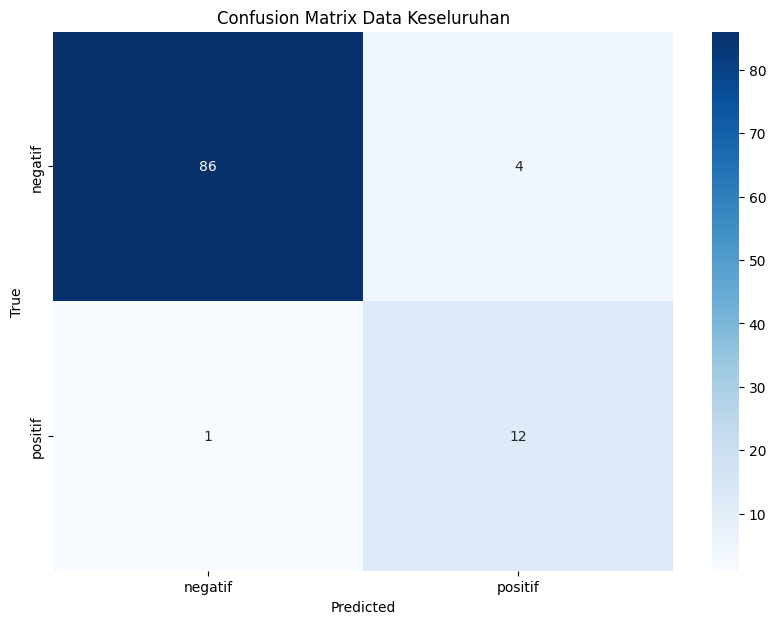


Facebook - akurasi: 1.0
Facebook - precision: 1.0
Facebook - recall: 1.0
Facebook - F1-Score: 1.0

Facebook - Hasil Klasifikasi:
               precision    recall  f1-score   support

     negatif       1.00      1.00      1.00        24
     positif       1.00      1.00      1.00         1

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



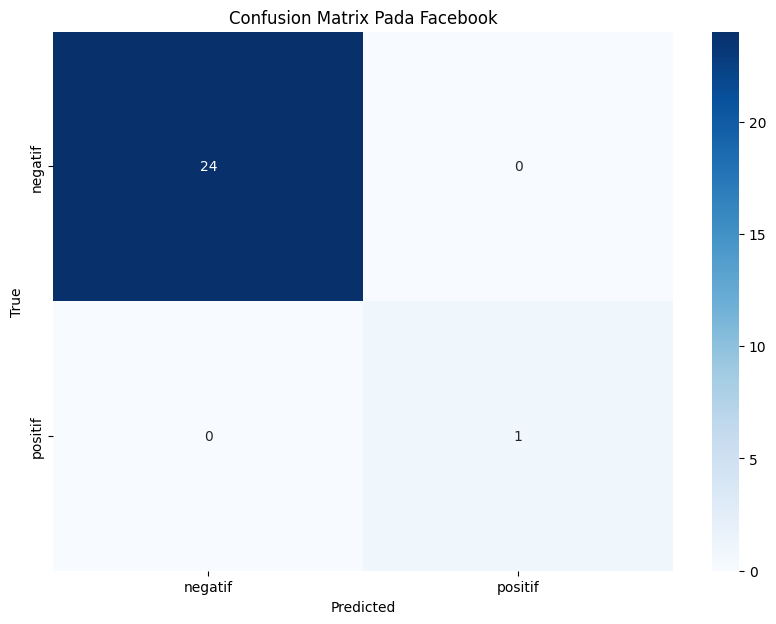


Instagram - akurasi: 0.975
Instagram - precision: 0.9800000000000001
Instagram - recall: 0.975
Instagram - F1-Score: 0.9762128325508608

Instagram - Hasil Klasifikasi:
               precision    recall  f1-score   support

     negatif       1.00      0.97      0.99        36
     positif       0.80      1.00      0.89         4

    accuracy                           0.97        40
   macro avg       0.90      0.99      0.94        40
weighted avg       0.98      0.97      0.98        40



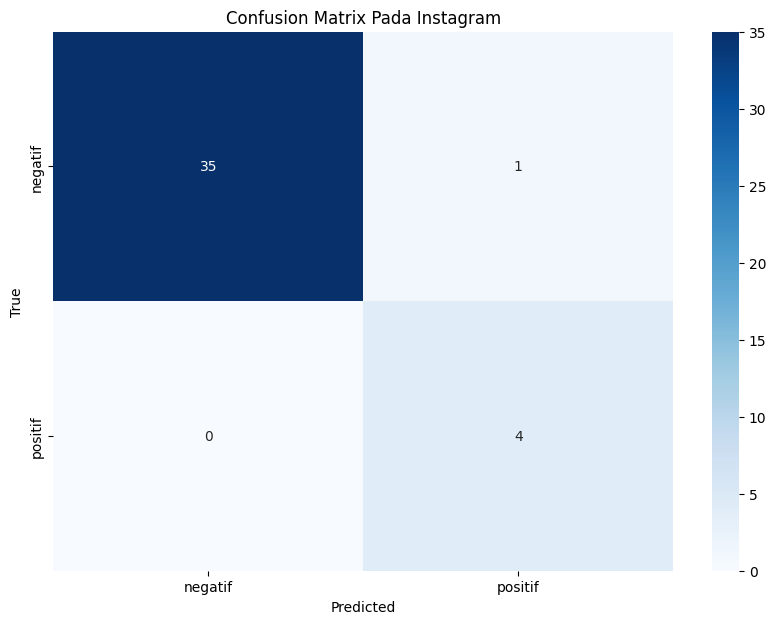


YouTube - akurasi: 0.8947368421052632
YouTube - precision: 0.9086466165413535
YouTube - recall: 0.8947368421052632
YouTube - F1-Score: 0.8987699132889695

YouTube - Hasil Klasifikasi:
               precision    recall  f1-score   support

     negatif       0.96      0.90      0.93        30
     positif       0.70      0.88      0.78         8

    accuracy                           0.89        38
   macro avg       0.83      0.89      0.85        38
weighted avg       0.91      0.89      0.90        38



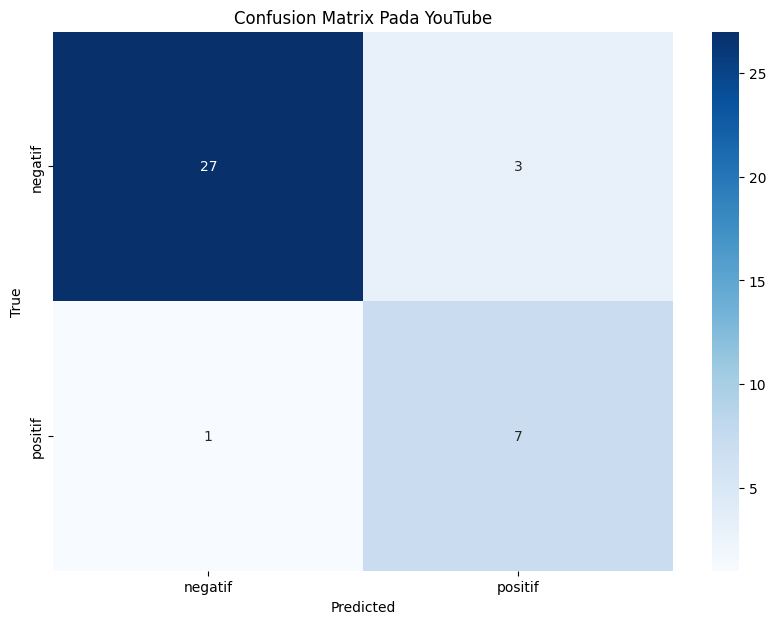

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Membaca data uji yang sudah diprediksi
test_data = pd.read_csv('test_data_with_predictions.csv')

# Menentukan platform berdasarkan kolom "Post Link"
def determine_platform(link):
    if 'facebook' in link:
        return 'Facebook'
    elif 'instagram' in link:
        return 'Instagram'
    elif 'youtube' in link:
        return 'YouTube'
    else:
        return 'Unknown'

test_data['Platform'] = test_data['Post Link'].apply(determine_platform)

# Mengambil label asli dan prediksi
y_test = test_data['Label']
y_pred = test_data['Predicted_Sentiment']

# Evaluasi Model secara keseluruhan
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"akurasi keseluruhan: {accuracy}")
print(f"precision keseluruhan: {precision}")
print(f"recall keseluruhan: {recall}")
print(f"F1-Score keseluruhan: {f1}")
print("\nHasil Klasifikasi Keseluruhan:\n", classification_report(y_test, y_pred))

# Tentukan label kelas Anda secara manual jika tidak tersedia dari nb_classifier
class_labels = ['negatif', 'positif']

# Fungsi untuk menampilkan confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Plot confusion matrix untuk keseluruhan data
plot_confusion_matrix(y_test, y_pred, 'Confusion Matrix Data Keseluruhan')

# Filter data berdasarkan platform dan hitung metrik evaluasi untuk masing-masing platform
platforms = ['Facebook', 'Instagram', 'YouTube']
for platform in platforms:
    platform_data = test_data[test_data['Platform'] == platform]
    y_test_platform = platform_data['Label']
    y_pred_platform = platform_data['Predicted_Sentiment']

    # Menghitung metrik evaluasi
    accuracy_platform = accuracy_score(y_test_platform, y_pred_platform)
    precision_platform = precision_score(y_test_platform, y_pred_platform, average='weighted')
    recall_platform = recall_score(y_test_platform, y_pred_platform, average='weighted')
    f1_platform = f1_score(y_test_platform, y_pred_platform, average='weighted')

    print(f"\n{platform} - akurasi: {accuracy_platform}")
    print(f"{platform} - precision: {precision_platform}")
    print(f"{platform} - recall: {recall_platform}")
    print(f"{platform} - F1-Score: {f1_platform}")
    print(f"\n{platform} - Hasil Klasifikasi:\n", classification_report(y_test_platform, y_pred_platform))

    # Plot confusion matrix untuk platform
    plot_confusion_matrix(y_test_platform, y_pred_platform, f'Confusion Matrix Pada {platform}')


# **VISUALISASI HASIL**

visualisasi hasil prediksi data

Jumlah data pada masing-masing platform:
Platform
Instagram    40
YouTube      38
Facebook     25
Name: count, dtype: int64


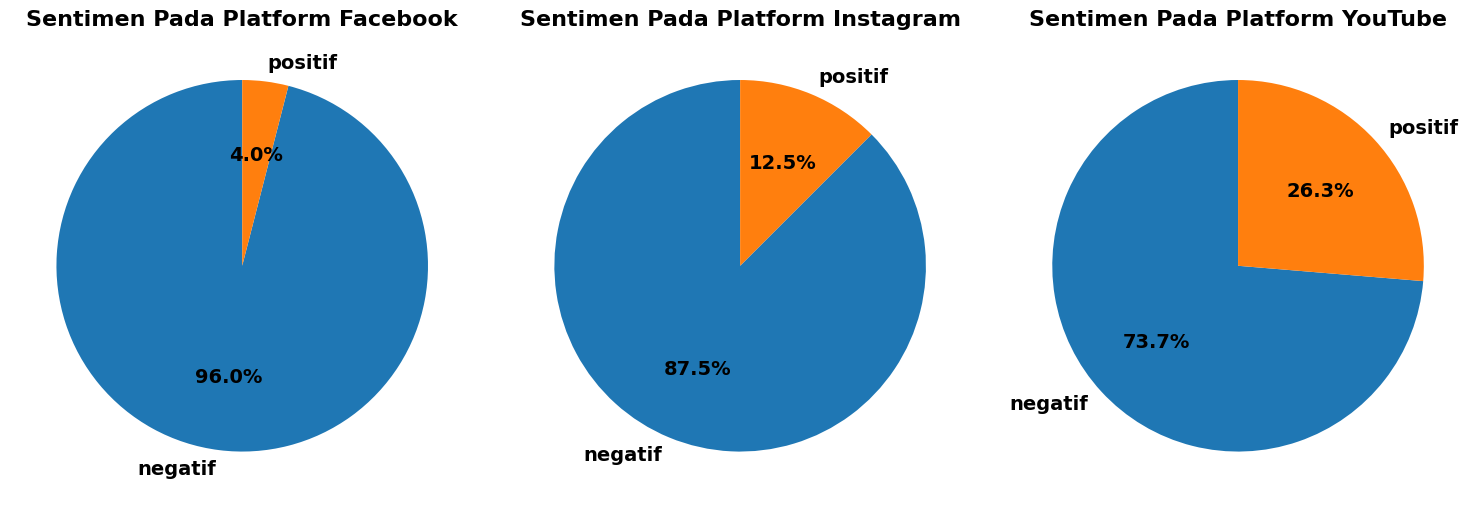

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data
df = pd.read_csv('test_data_with_predictions.csv')

# Menambahkan informasi platform berdasarkan 'Post Link'
df['Platform'] = df['Post Link'].apply(lambda x: 'Facebook' if 'facebook' in x else ('Instagram' if 'instagram' in x else 'YouTube'))

# Menampilkan jumlah data per platform
platform_counts = df['Platform'].value_counts()
print("Jumlah data pada masing-masing platform:")
print(platform_counts)

# Mengelompokkan data berdasarkan Platform dan Sentimen
sentiment_distribution = df.groupby(['Platform', 'Predicted_Sentiment']).size().unstack().fillna(0)

# Membuat pie chart
num_platforms = len(sentiment_distribution)
fig, axes = plt.subplots(1, num_platforms, figsize=(5 * num_platforms, 5))

for i, platform in enumerate(sentiment_distribution.index):
    if num_platforms == 1:
        ax = axes
    else:
        ax = axes[i]
    sentiment_distribution.loc[platform].plot(
        kind='pie',
        autopct=lambda pct: f'{pct:.1f}%',
        startangle=90,
        ax=ax,
        textprops={'fontweight': 'bold', 'fontsize': 14}  # Membuat label dan persentase menjadi bold dan lebih besar
    )
    ax.set_title(f'Sentimen Pada Platform {platform}', fontweight='bold', fontsize=16)  # Membuat judul menjadi bold dan lebih besar
    ax.set_ylabel('')  # Menghapus label Y agar tidak mengganggu

plt.tight_layout()
plt.show()


visualisasi data sebenarnya

Jumlah data pada masing-masing platform:
Platform
Instagram    40
YouTube      38
Facebook     25
Name: count, dtype: int64


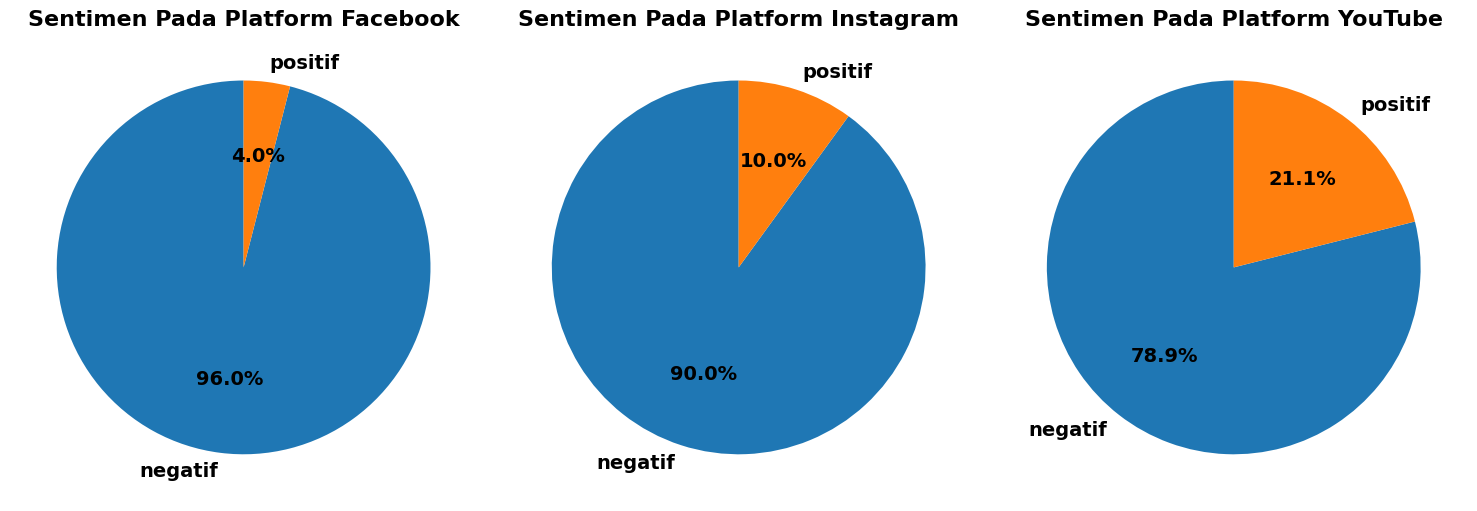

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data
df = pd.read_csv('test_data_with_predictions.csv')

# Menambahkan informasi platform berdasarkan 'Post Link'
df['Platform'] = df['Post Link'].apply(lambda x: 'Facebook' if 'facebook' in x else ('Instagram' if 'instagram' in x else 'YouTube'))

# Menampilkan jumlah data per platform
platform_counts = df['Platform'].value_counts()
print("Jumlah data pada masing-masing platform:")
print(platform_counts)

# Mengelompokkan data berdasarkan Platform dan Sentimen
sentiment_distribution = df.groupby(['Platform', 'Label']).size().unstack().fillna(0)

# Membuat pie chart
num_platforms = len(sentiment_distribution)
fig, axes = plt.subplots(1, num_platforms, figsize=(5 * num_platforms, 5))

for i, platform in enumerate(sentiment_distribution.index):
    if num_platforms == 1:
        ax = axes
    else:
        ax = axes[i]
    sentiment_distribution.loc[platform].plot(
        kind='pie',
        autopct=lambda pct: f'{pct:.1f}%',
        startangle=90,
        ax=ax,
        textprops={'fontweight': 'bold', 'fontsize': 14}  # Membuat label dan persentase menjadi bold dan lebih besar
    )
    ax.set_title(f'Sentimen Pada Platform {platform}', fontweight='bold', fontsize=16)  # Membuat judul menjadi bold
    ax.set_ylabel('')  # Menghapus label Y agar tidak mengganggu

plt.tight_layout()
plt.show()

Visualisasi Data Keseluruhan

**Jumlah data per platform:**
Platform
YouTube      194
Instagram    184
Facebook     137
Name: count, dtype: int64

**Jumlah data per platform dan sentimen:**
Label      negatif  positif
Platform                   
Facebook       125       12
Instagram      150       34
YouTube        142       52


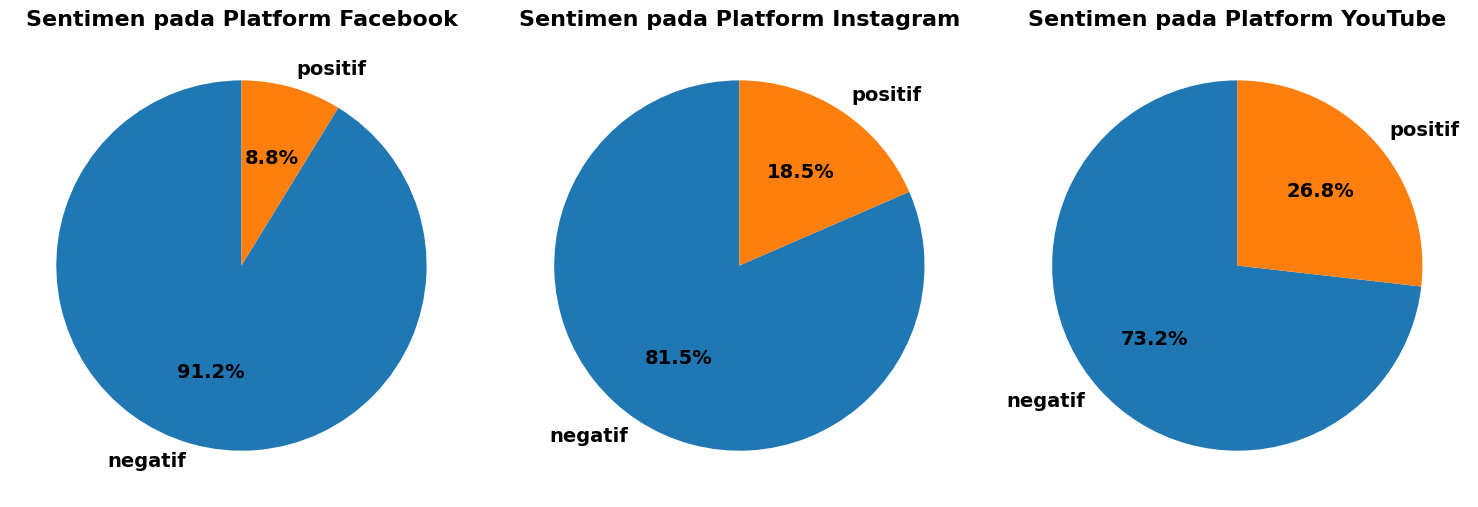

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data training dan testing
train_df = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')

# Menggabungkan data training dan testing
df = pd.concat([train_df, test_df])

# Menambahkan informasi platform berdasarkan 'Post Link'
df['Platform'] = df['Post Link'].apply(lambda x: 'Facebook' if 'facebook' in x else ('Instagram' if 'instagram' in x else 'YouTube'))

# Menghitung jumlah data per platform
platform_counts = df['Platform'].value_counts()
print("**Jumlah data per platform:**")
print(platform_counts)

# Menghitung jumlah data per platform dan sentimen
sentiment_distribution = df.groupby(['Platform', 'Label']).size().unstack().fillna(0)
print("\n**Jumlah data per platform dan sentimen:**")
print(sentiment_distribution)

# Membuat pie chart
num_platforms = len(sentiment_distribution)
fig, axes = plt.subplots(1, num_platforms, figsize=(5 * num_platforms, 5))

for i, platform in enumerate(sentiment_distribution.index):
    if num_platforms == 1:
        ax = axes
    else:
        ax = axes[i]
    sentiment_distribution.loc[platform].plot(
        kind='pie',
        autopct='%1.1f%%',
        startangle=90,
        ax=ax,
        textprops={'fontweight': 'bold', 'fontsize': '14'}  # Membuat label dan persentase menjadi bold
    )
    ax.set_title(f'Sentimen pada Platform {platform}', fontweight='bold', fontsize='16')  # Membuat judul menjadi bold
    ax.set_ylabel('')  # Menghapus label Y agar tidak mengganggu

plt.tight_layout()
plt.show()



word cloud data keseluruhan

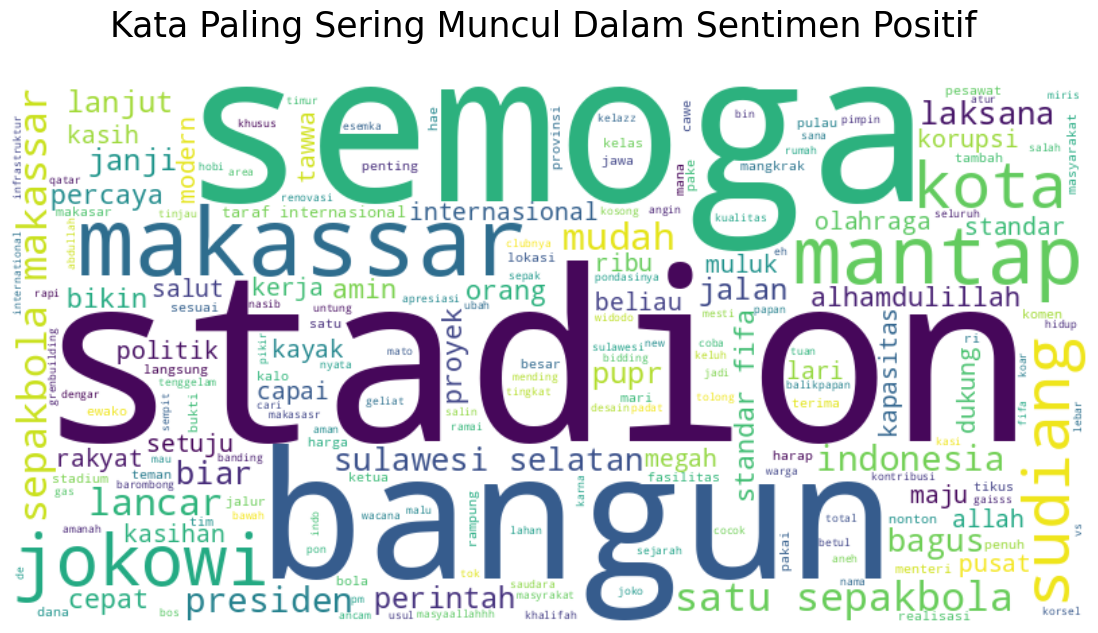

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Membaca data dari train_data.csv dan test_data.csv
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

# Menggabungkan data train dan test
combined_data = pd.concat([train_data, test_data])

# Memisahkan komentar berdasarkan sentimen
positive_comments = combined_data[combined_data['Label'] == 'positif']['Stemming']

# Menggabungkan semua komentar positif menjadi satu string
positive_text = ' '.join(positive_comments)

# Menghasilkan word cloud
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Plot word cloud positif
plt.figure(figsize=(15, 7))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Kata Paling Sering Muncul Dalam Sentimen Positif \n', fontsize=25)
plt.axis('off')
plt.show()


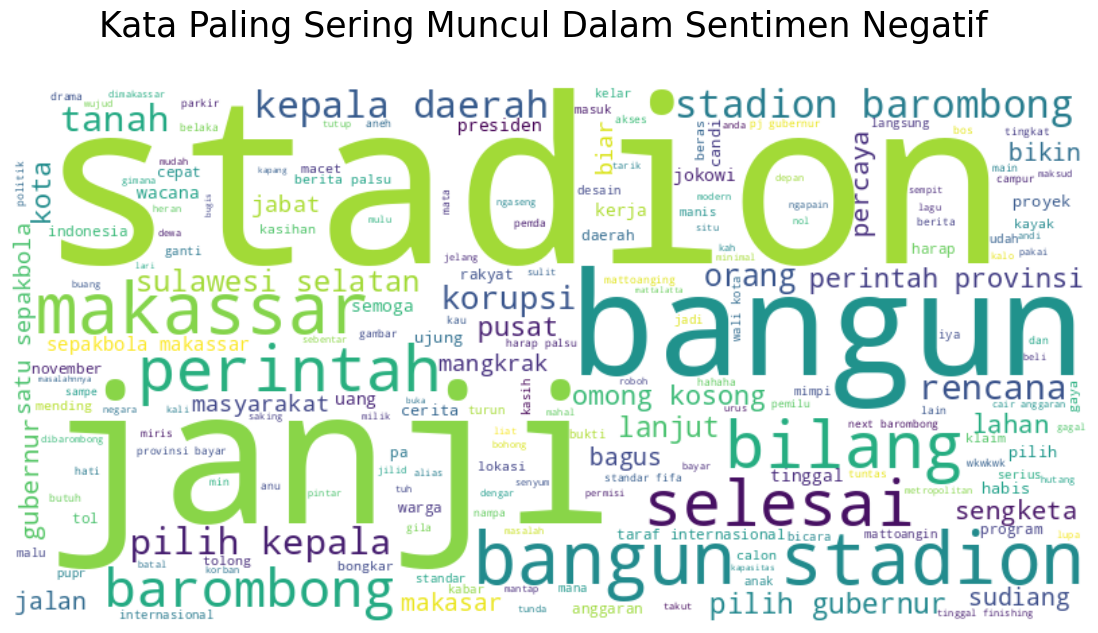

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Membaca data dari train_data.csv dan test_data.csv
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

# Menggabungkan data train dan test
combined_data = pd.concat([train_data, test_data])

# Memisahkan komentar berdasarkan sentimen
negative_comments = combined_data[combined_data['Label'] == 'negatif']['Stemming']

# Menggabungkan semua komentar negatif menjadi satu string
negative_text = ' '.join(negative_comments.dropna())  # Menangani kemungkinan nilai NaN

# Menghasilkan word cloud
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Plot word cloud negatif
plt.figure(figsize=(15, 7))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Kata Paling Sering Muncul Dalam Sentimen Negatif \n', fontsize=25)
plt.axis('off')
plt.show()



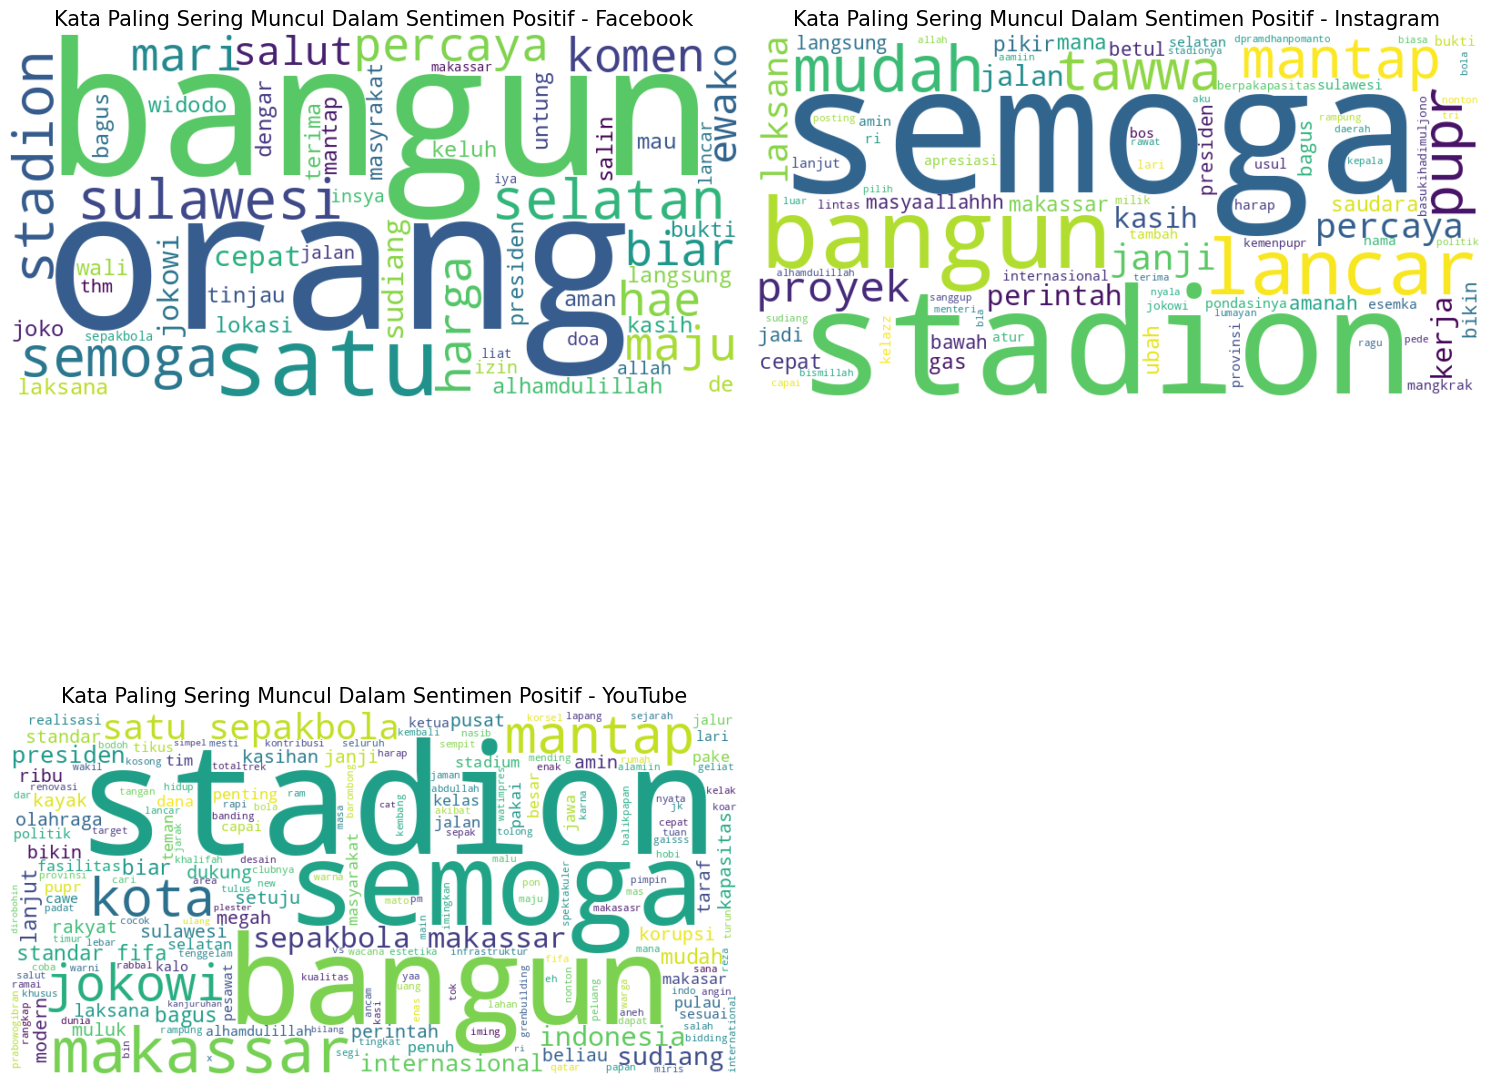

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Membaca data dari train_data.csv dan test_data.csv
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

# Menambahkan informasi platform berdasarkan 'Post Link'
train_data['Platform'] = train_data['Post Link'].apply(lambda x: 'Facebook' if 'facebook' in x else ('Instagram' if 'instagram' in x else 'YouTube'))
test_data['Platform'] = test_data['Post Link'].apply(lambda x: 'Facebook' if 'facebook' in x else ('Instagram' if 'instagram' in x else 'YouTube'))

# Menggabungkan data train dan test
combined_data = pd.concat([train_data, test_data])

# Daftar platform yang akan diperiksa
platforms = ['Facebook', 'Instagram', 'YouTube']

# Menyiapkan layout untuk tampilan grafik
plt.figure(figsize=(15, 15))  # Ukuran figure yang lebih besar untuk menampung semua word cloud

for idx, platform in enumerate(platforms, 1):
    # Memisahkan komentar berdasarkan platform dan sentimen
    platform_data = combined_data[combined_data['Platform'] == platform]
    positive_comments = platform_data[platform_data['Label'] == 'positif']['Stemming']

    # Menggabungkan semua komentar positif menjadi satu string
    positive_text = ' '.join(positive_comments)

    # Menghasilkan word cloud
    positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

    # Plot word cloud positif
    plt.subplot(2, 2, idx)  # Menampilkan dalam 2 baris 2 kolom, mengisi subplot ke-idx
    plt.imshow(positive_wordcloud, interpolation='bilinear')
    plt.title(f'Kata Paling Sering Muncul Dalam Sentimen Positif - {platform}', fontsize=15)
    plt.axis('off')

# Mengatur layout untuk memastikan jarak antar grafik
plt.tight_layout()
plt.show()


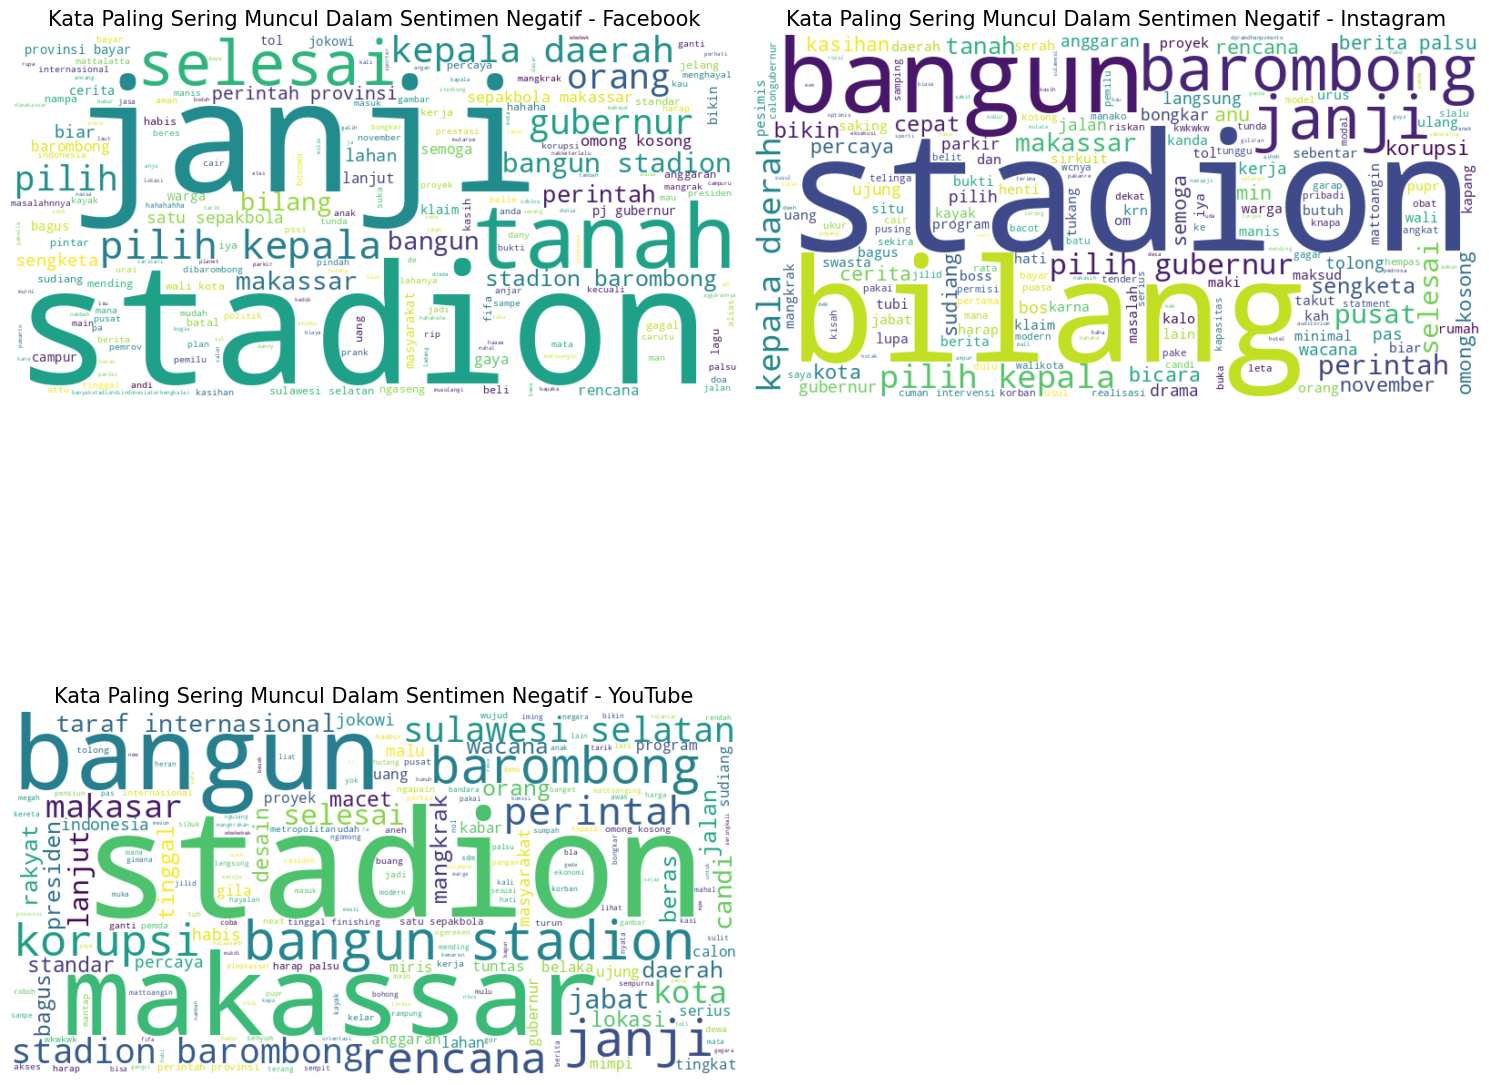

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Membaca data dari train_data.csv dan test_data.csv
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

# Menambahkan informasi platform berdasarkan 'Post Link'
train_data['Platform'] = train_data['Post Link'].apply(lambda x: 'Facebook' if 'facebook' in x else ('Instagram' if 'instagram' in x else 'YouTube'))
test_data['Platform'] = test_data['Post Link'].apply(lambda x: 'Facebook' if 'facebook' in x else ('Instagram' if 'instagram' in x else 'YouTube'))

# Menggabungkan data train dan test
combined_data = pd.concat([train_data, test_data])

# Daftar platform yang akan diperiksa
platforms = ['Facebook', 'Instagram', 'YouTube']

# Menyiapkan layout untuk tampilan grafik
plt.figure(figsize=(15, 15))  # Ukuran figure yang lebih besar untuk menampung semua word cloud

for idx, platform in enumerate(platforms, 1):
    # Memisahkan komentar berdasarkan platform dan sentimen
    platform_data = combined_data[combined_data['Platform'] == platform]
    positive_comments = platform_data[platform_data['Label'] == 'negatif']['Stemming']

    # Menggabungkan semua komentar positif menjadi satu string
    positive_text = ' '.join(positive_comments)

    # Menghasilkan word cloud
    positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

    # Plot word cloud positif
    plt.subplot(2, 2, idx)  # Menampilkan dalam 2 baris 2 kolom, mengisi subplot ke-idx
    plt.imshow(positive_wordcloud, interpolation='bilinear')
    plt.title(f'Kata Paling Sering Muncul Dalam Sentimen Negatif - {platform}', fontsize=15)
    plt.axis('off')

# Mengatur layout untuk memastikan jarak antar grafik
plt.tight_layout()
plt.show()
